# Loading the Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
df=pd.read_csv("E:\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Uni,Bi &Multivariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.groupby('Exited').agg(['mean', 'median'])

C:\Users\navee\AppData\Local\Temp\ipykernel_21480\2519455145.py:1: FutureWarning: ['Surname', 'Geography', 'Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Exited').agg(['mean', 'median'])


RowNumber            CustomerId             CreditScore         \
               mean  median          mean      median        mean median   
Exited                                                                     
0       5024.694964  5042.0  1.569117e+07  15691543.0  651.853196  653.0   
1       4905.917526  4871.0  1.569005e+07  15688963.0  645.351497  646.0   

              Age           Tenure              Balance             \
             mean median      mean median          mean     median   
Exited                                                               
0       37.408389   36.0  5.033279    5.0  72745.296779   92072.68   
1       44.837997   45.0  4.932744    5.0  91108.539337  109349.29   

       NumOfProducts        HasCrCard        IsActiveMember         \
                mean median      mean median           mean median   
Exited                                                               
0           1.544267    2.0  0.707146    1.0       0.554565    1.0   
1           1.475209    1.0  0.699067    1.0       0.360825    0.0   

       EstimatedSalary             
                  mean     median  
Exited                             
0         99738.391772   99645.04  
1        101465.677531  102460.84

<AxesSubplot: xlabel='Age', ylabel='Count'>

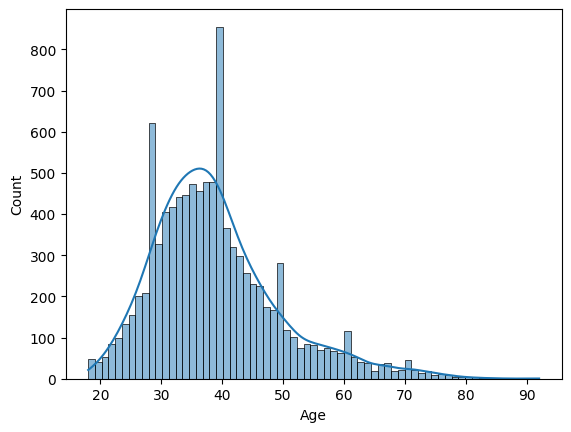

In [12]:
sns.histplot(data=df['Age'],kde=True)

<AxesSubplot: xlabel='Balance', ylabel='Count'>

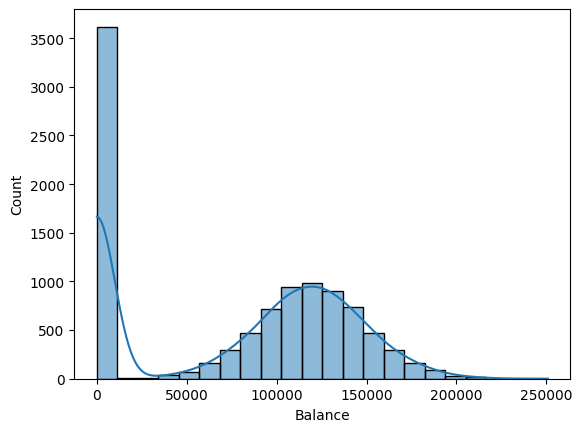

In [13]:
sns.histplot(data=df['Balance'],kde=True)

In [14]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [15]:
df['Tenure'].fillna(df['Tenure'].mean(),inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Outliers

<AxesSubplot: >

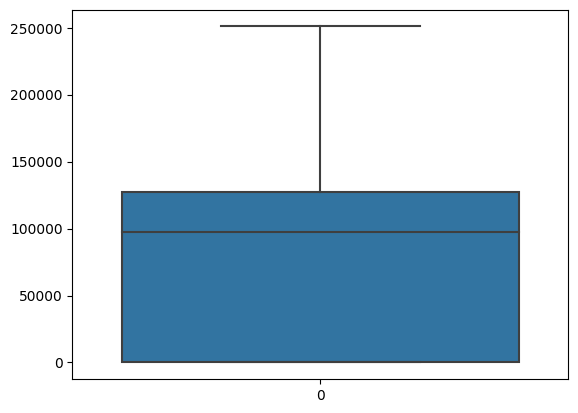

In [16]:
sns.boxplot(df.Balance)

<AxesSubplot: >

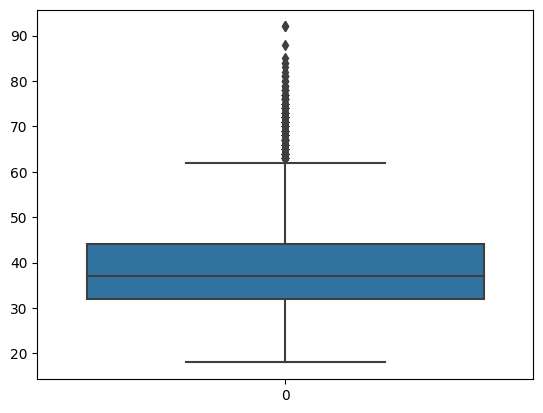

In [17]:
sns.boxplot(df.Age)


<AxesSubplot: >

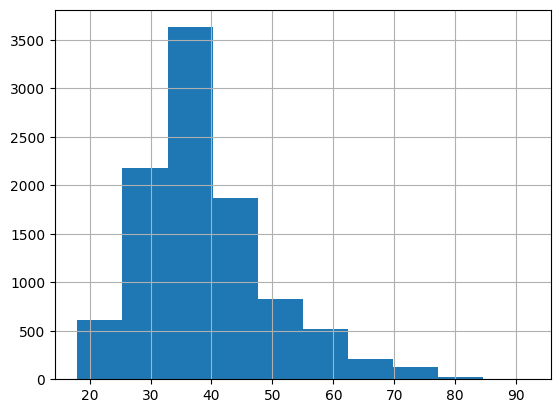

In [18]:
df['Age'].hist()

In [20]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Balance: ',df['Balance'].skew())

skewness value of Age:  1.0113202630234552
skewness value of Balance:  -0.14110871094154384


In [25]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['Age'] < Q1 - whisker_width*IQR) | (df['Age'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0


In [26]:
fare_mean = df['Age'].mean()
fare_std = df['Age'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['Age'] < low) | (df['Age'] > high)]
fare_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0


In [29]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

<AxesSubplot: >

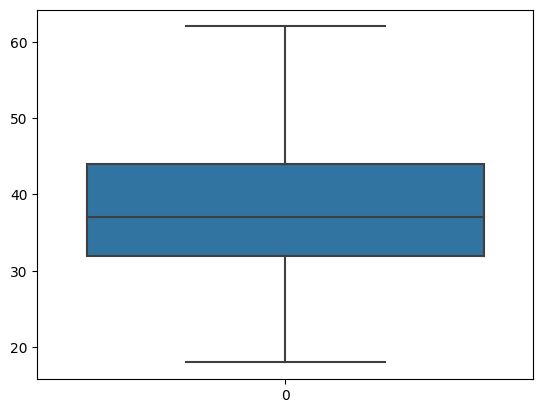

In [38]:
sns.boxplot(df['Age'])

# Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df.Geography=le.fit_transform(df.Geography)
df.Gender=le.fit_transform(df.Gender)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


# Splitting Dependent & Independent Var

In [47]:
features = ['CreditScore','EstimatedSalary','Age','Tenure']
X = df.loc[:, features]
Y = df.loc[:, ['Balance']]

In [49]:
print (X)


      CreditScore  EstimatedSalary   Age  Tenure
0             619        101348.88  42.0       2
1             608        112542.58  41.0       1
2             502        113931.57  42.0       8
3             699         93826.63  39.0       1
4             850         79084.10  43.0       2
...           ...              ...   ...     ...
9995          771         96270.64  39.0       5
9996          516        101699.77  35.0      10
9997          709         42085.58  36.0       7
9998          772         92888.52  42.0       3
9999          792         38190.78  28.0       4

[10000 rows x 4 columns]


In [50]:
print (Y)

        Balance
0          0.00
1      83807.86
2     159660.80
3          0.00
4     125510.82
...         ...
9995       0.00
9996   57369.61
9997       0.00
9998   75075.31
9999  130142.79

[10000 rows x 1 columns]


# Splitting into Training & Testing 

In [51]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [52]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)
reg.fit(X_train, y_train)
reg.predict(X_test[0:10])

array([74756.88957333, 74756.88957333, 78007.65487839, 74756.88957333,
       74756.88957333, 78007.65487839, 74756.88957333, 74756.88957333,
       78007.65487839, 88009.06472222])

In [53]:
score = reg.score(X_test, y_test)
print(score)

-0.0016791186432207894
